# Portfolio Optimization and Analysis

#### Imports

In [172]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
%matplotlib inline

#### Get Quandl private key

In [173]:
quandl_private_key = open('private/quandlKey.txt', 'r').read()

#### Period of the analysis

In [174]:
start_date = pd.to_datetime('2017-02-01')
end_date = pd.to_datetime('2018-10-22')

#### Create the portfolio

In [175]:
portfolio_list = ['INDUSINDBK', 'BRITANNIA', 'ASIANPAINT', 'JSWSTEEL']

In [176]:
portfolio_close_price = pd.DataFrame()

for stock in portfolio_list:
    portfolio_close_price[stock] = quandl.get("NSE/{}.5".format(stock), authtoken=quandl_private_key, start_date=start_date, end_date=end_date)['Close']

In [177]:
portfolio_close_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426 entries, 2017-02-01 to 2018-10-22
Data columns (total 4 columns):
INDUSINDBK    426 non-null float64
BRITANNIA     426 non-null float64
ASIANPAINT    426 non-null float64
JSWSTEEL      426 non-null float64
dtypes: float64(4)
memory usage: 16.6 KB


In [178]:
portfolio_close_price.describe()

,INDUSINDBK,BRITANNIA,ASIANPAINT,JSWSTEEL
count,426.000000,426.000000,426.000000,426.000000
mean,1673.016197,4709.515962,1183.138498,270.907394
std,190.516597,1018.189364,101.998910,61.461676
min,1284.000000,3059.150000,960.800000,176.250000
25%,1526.437500,3721.300000,1126.825000,213.487500
50%,1670.075000,4706.475000,1157.025000,265.850000
75%,1846.712500,5502.862500,1249.675000,317.100000
max,2023.050000,6900.150000,1467.750000,417.050000


In [179]:
portfolio_close_price.head()

,INDUSINDBK,BRITANNIA,ASIANPAINT,JSWSTEEL
Date,,,,
2017-02-01,1307.75,3234.75,991.0,197.30
2017-02-02,1284.00,3231.00,989.0,193.90
2017-02-03,1303.20,3230.85,985.9,191.65
2017-02-06,1317.05,3285.00,992.5,192.35
2017-02-07,1324.25,3230.60,999.3,189.00


In [180]:
portfolio_close_price.to_csv('portfolio_close.csv')

#### Normalize Prices
This is the same as cumulative daily returns

In [181]:
portfolio_close_price_normalized = portfolio_close_price.copy()

for stock in portfolio_close_price.columns:
    portfolio_close_price_normalized[stock] = portfolio_close_price[stock]/portfolio_close_price.iloc[0][stock]

In [182]:
portfolio_close_price_normalized.head()

,INDUSINDBK,BRITANNIA,ASIANPAINT,JSWSTEEL
Date,,,,
2017-02-01,1.000000,1.000000,1.000000,1.000000
2017-02-02,0.981839,0.998841,0.997982,0.982767
2017-02-03,0.996521,0.998794,0.994854,0.971363
2017-02-06,1.007111,1.015534,1.001514,0.974911
2017-02-07,1.012617,0.998717,1.008375,0.957932


In [183]:
portfolio_close_price_normalized.tail()

,INDUSINDBK,BRITANNIA,ASIANPAINT,JSWSTEEL
Date,,,,
2018-10-15,1.244083,1.753335,1.261655,1.909782
2018-10-16,1.239189,1.762269,1.279112,1.893563
2018-10-17,1.226458,1.712976,1.270434,1.832995
2018-10-19,1.205659,1.719917,1.246620,1.842372
2018-10-22,1.108354,1.725064,1.211302,1.799797


#### Allocations

In [184]:
#30% in Stock 1
#20% in Stock 2
#40% in Stock 3
#10% in Stock 4
allocation = [0.3,0.2,0.4,0.1]

In [185]:
portfolio_size = 1000000

In [186]:
portfolio_normalized_allocation = portfolio_close_price_normalized.copy()

allocation_index = 0

for stock in portfolio_close_price_normalized.columns:
    portfolio_normalized_allocation[stock] = portfolio_close_price_normalized[stock].apply(lambda normalized_return : normalized_return * allocation[allocation_index] * portfolio_size)
    allocation_index += 1

In [187]:
portfolio_normalized_allocation.head()

,INDUSINDBK,BRITANNIA,ASIANPAINT,JSWSTEEL
Date,,,,
2017-02-01,300000.000000,200000.000000,400000.000000,100000.000000
2017-02-02,294551.710954,199768.142824,399192.734612,98276.735935
2017-02-03,298956.222520,199758.868537,397941.473259,97136.340598
2017-02-06,302133.435290,203106.886158,400605.449041,97491.130258
2017-02-07,303785.127127,199743.411392,403350.151362,95793.208312


In [188]:
portfolio_normalized_allocation['Total Position'] = portfolio_normalized_allocation.sum(axis=1)

In [189]:
portfolio_normalized_allocation.tail()

,INDUSINDBK,BRITANNIA,ASIANPAINT,JSWSTEEL,Total Position
Date,,,,,
2018-10-15,373225.004779,350666.975810,504661.957619,190978.205778,1.419532e+06
2018-10-16,371756.834257,352453.821779,511644.803229,189356.310188,1.425212e+06
2018-10-17,367937.296884,342595.254656,508173.562059,183299.543842,1.402006e+06
2018-10-19,361697.572166,343983.306283,498647.830474,184237.202230,1.388566e+06
2018-10-22,332506.212961,345012.752145,484520.686176,179979.726305,1.342019e+06


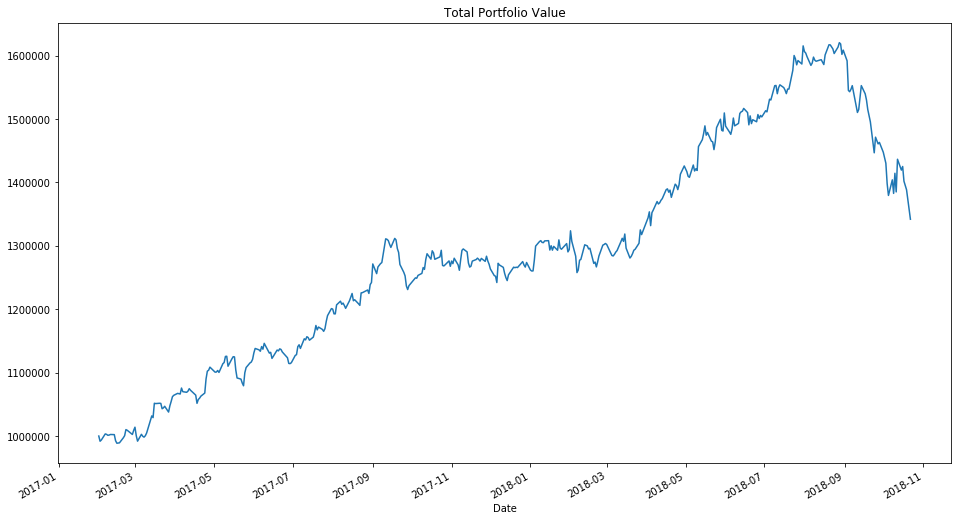

In [190]:
portfolio_normalized_allocation['Total Position'].plot(figsize=(16,9))
plt.title('Total Portfolio Value');

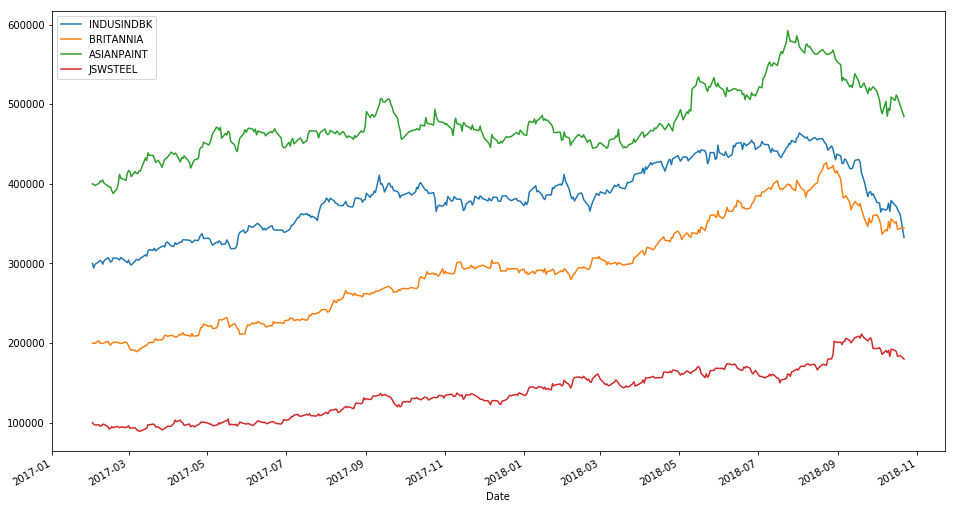

In [191]:
portfolio_normalized_allocation.drop('Total Position',axis=1).plot(kind='line', figsize=(16,9));

## Portfolio Statistics

#### Daily Returns

In [192]:
portfolio_normalized_allocation['Daily Return'] = portfolio_normalized_allocation['Total Position'].pct_change(1)

In [193]:
portfolio_normalized_allocation.head()

,INDUSINDBK,BRITANNIA,ASIANPAINT,JSWSTEEL,Total Position,Daily Return
Date,,,,,,
2017-02-01,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2017-02-02,294551.710954,199768.142824,399192.734612,98276.735935,9.917893e+05,-0.008211
2017-02-03,298956.222520,199758.868537,397941.473259,97136.340598,9.937929e+05,0.002020
2017-02-06,302133.435290,203106.886158,400605.449041,97491.130258,1.003337e+06,0.009604
2017-02-07,303785.127127,199743.411392,403350.151362,95793.208312,1.002672e+06,-0.000663


In [194]:
#Overall Cumulative Return (not daily)
cumulative_return = 100 * (portfolio_normalized_allocation['Total Position'][-1]/portfolio_normalized_allocation['Total Position'][0] - 1 )
print('Our return was {}%!'.format(cumulative_return))

Our return was 34.20193775865712%!


#### Avg Daily Return

In [195]:
portfolio_normalized_allocation['Daily Return'].mean()

0.0007331094351127575

#### Standard Deviation of Daily Return

In [196]:
portfolio_normalized_allocation['Daily Return'].std()

0.009037304282010583

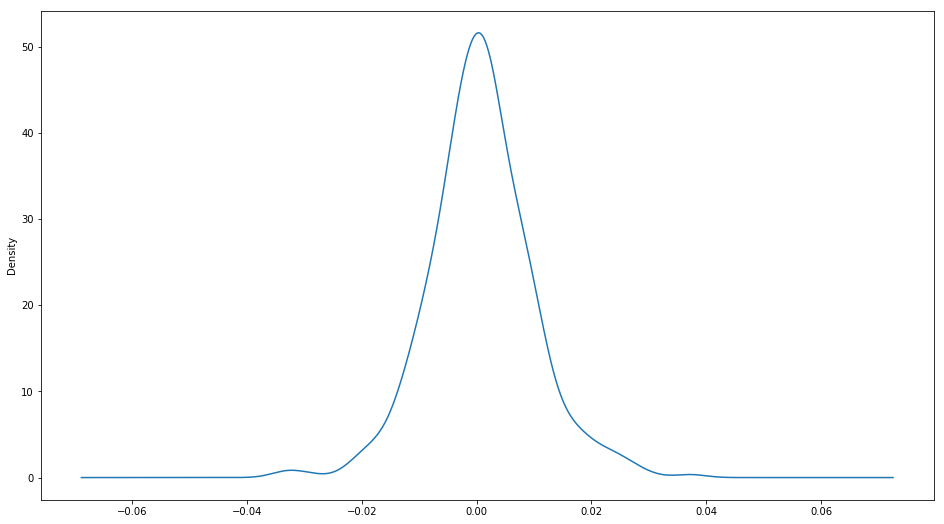

In [197]:
portfolio_normalized_allocation['Daily Return'].plot(kind='kde', figsize=(16,9));

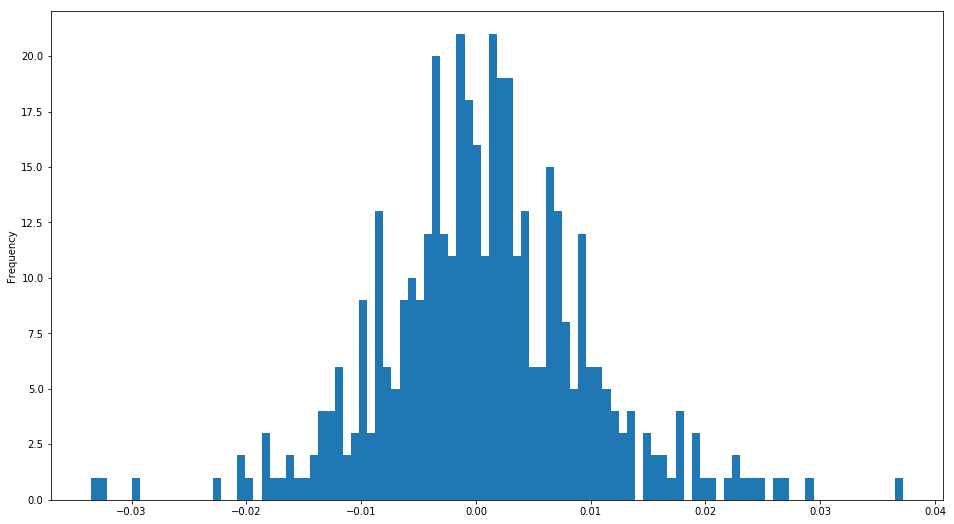

In [198]:
portfolio_normalized_allocation['Daily Return'].plot(kind='hist', bins=100, figsize=(16,9));

# Sharpe Ratio
The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations.

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

Daily = sqrt(252)
Weekly = sqrt(52)
Monthly = sqrt(12)

In [222]:
daily_rate = ((1.0 + 7)**(1/252))-1
daily_rate

0.008285891695374081

In [223]:
sharpe_ratio = (portfolio_normalized_allocation['Daily Return'].mean() - daily_rate) / portfolio_normalized_allocation['Daily Return'].std()

In [224]:
sharpe_ratio

-0.8357339782500951

In [225]:
# https://www.investopedia.com/articles/07/sharpe_ratio.asp
annualized_sharpe_ratio = (252**0.5)*sharpe_ratio
annualized_sharpe_ratio

-13.266865611938492

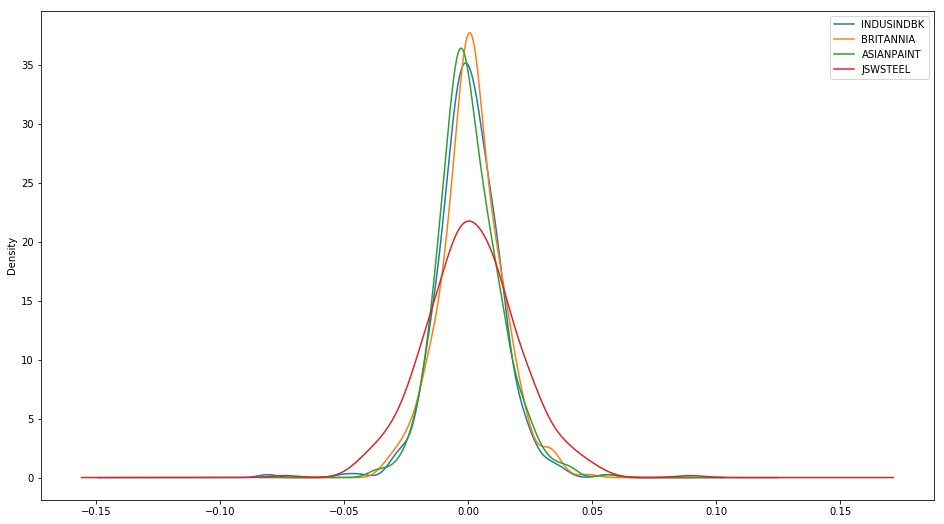

In [218]:
fig, ax = plt.subplots(figsize = (16,9))

for stock in portfolio_close_price.columns:
    portfolio_close_price[stock].pct_change(1).plot('kde')
    ax.legend()

# Hedging

In [204]:
asset_returns = pd.DataFrame(portfolio_normalized_allocation['Daily Return'].iloc[1:])

In [205]:
asset_returns.columns = ['Asset Returns']

In [206]:
benchmark_returns = quandl.get("NSE/{}.4".format('CNX_NIFTY'), authtoken=quandl_private_key, start_date=start_date, end_date=end_date)['Close']
benchmark_returns = pd.DataFrame(benchmark_returns.pct_change()[1:])

In [207]:
benchmark_returns.columns = ['Benchmark Returns']

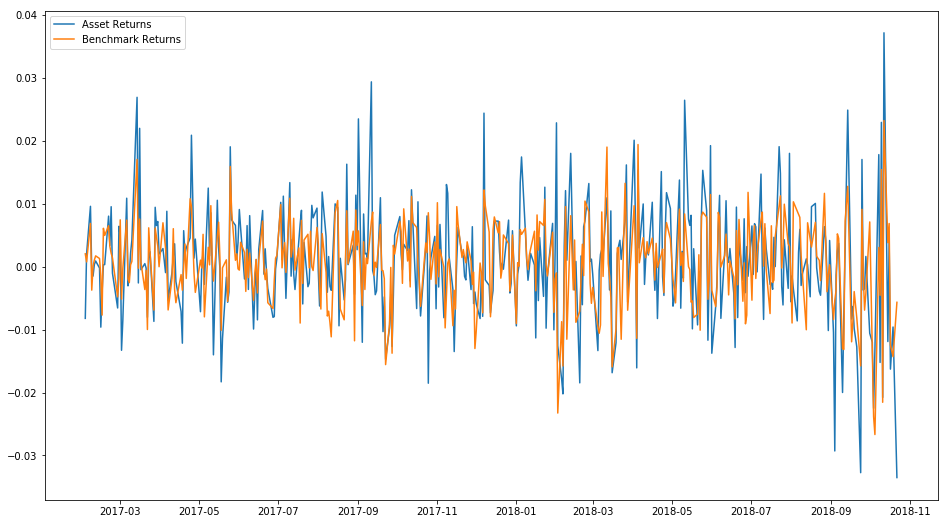

In [216]:
fig, ax = plt.subplots(figsize = (16,9))
ax.plot(asset_returns['Asset Returns'], label = 'Asset Returns')
ax.plot(benchmark_returns['Benchmark Returns'], label = 'Benchmark Returns')
ax.legend()

# Regression for Alpha and Beta Values

ValueError: x and y must be the same size

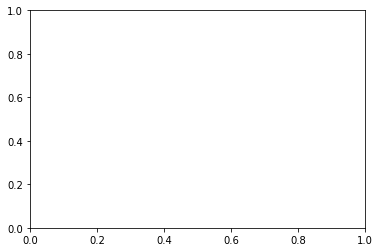

In [230]:
plt.scatter(benchmark_returns,asset_returns,alpha=0.6,s=50)
plt.xlabel('SPY Ret')
plt.ylabel('AAPL Ret')